<a href="https://colab.research.google.com/github/taynanmancilla/Estudo_DataScience_Python/blob/main/M3_Obtencao_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Módulo 3 - Manipulação de Dados com Python

O objetivo deste modulo e dar inicio ao processo de transformacao e processamento de dados, para deixar no formato que precisamos antes de realizar a analise. Alem disso, mostrarei como filtrar, modificar e juntar diferentes tipos de dados.

# 1. Bibliotecas
Nesse modulo vou dar continuidade explorando a biblioteca Pandas. 

Essa eh a biblioteca que usarei quando houver necessidade de processamento e tratamento de dados.

Alem disso, vou mostrar alguns procedimentos que podemos realizar com dados, utilizando dados financeiros como exemplo

In [ ]:
!pip install datetime
!pip install matplotlib plotly
!pip install yfinance quandl

In [2]:
# Manipulacao de dados
import pandas as pd
import numpy as np

# Visualizacao de dados
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Importacao de dados financeiros
import yfinance as yf
import quandl

# 2. Criar e organizar um Dataframe

## 2.1. Dataframe simples, uma coluna

In [3]:
# Vou utilizar a API da Quandl (Nasdaq) para fazer a extracao dos dados da Selic

quandl.ApiConfig.api_key = 'syxeCNBrkSA698ShLRwb'

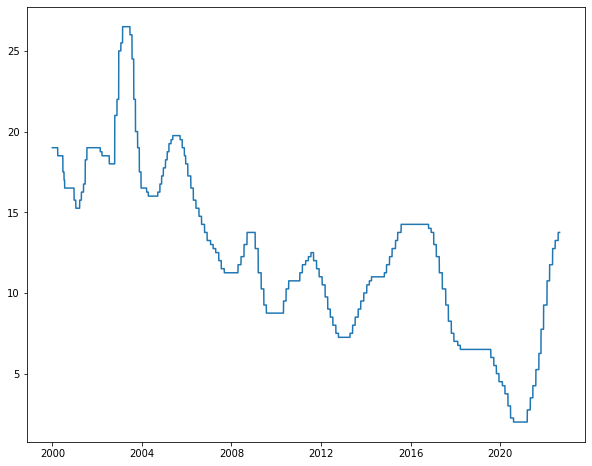

In [4]:
# Os codigos referentes a cada papel/moeda/taxadeJuros podem ser obtidos na busca do proprio site da Quandl
# Nesse caso, BCB/432 eh o codigo da Selic

selic = quandl.get("BCB/432", start_date = '2000-01-01', end_date = '2022-12-31')

# Abrindo a area da plotagem com matplotlib
plt.figure(figsize = (10,8)) # Passando largura e altura como parametro
plt.plot(selic) # Passando o que sera plotado
plt.show() # Mostrando o plot

In [5]:
# Inspecionando o formato dos dados

selic.head()

,Value
Date,
2000-01-01,19.0
2000-01-02,19.0
2000-01-03,19.0
2000-01-04,19.0
2000-01-05,19.0


Observando a estrutura do Dataframe acima, percebe-se que ele possui apenas uma coluna e um indice (data). Dataframes assim sao faceis de trabalhar pois as tarefas realizadas nele sao automaticamente aplicadas a sua unica coluna, desse modo, nao ha neceissade de informar o nome dessa unica coluna

## 2.2 Filtros Simples
Considerando que precisaria selecionar um valor de Selic para um dia especifico, como pode ser feito?

Pra isso usa-se os metodos .loc e .iloc

A ideia desses metodos eh possibilitar um filtro nos nossos dados pra obter uma linha ou celulas especificas

METODO .LOC

Deve ser utilizado quando o filtro deve ser feito com a metrica utilizada no indice do dataframe

Por exemplo, a metrica utilizada como indice nesse dataframe eh 'data', logo, nesse caso devemos usar o .loc com a data que queremos fazer o filtro

In [6]:
selic_filtrada = selic.loc['2021-05-26']
selic_filtrada

Value    3.5
Name: 2021-05-26 00:00:00, dtype: float64

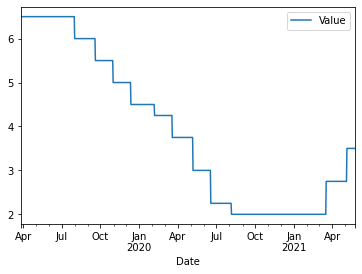

In [7]:
# Obter os dados entre duas datas especificas
selic_filtrada = selic.loc['2019-03-26':'2021-05-26']
selic_filtrada.plot()

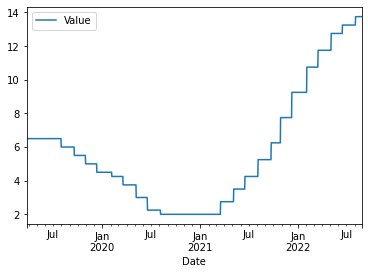

In [8]:
# Filtro de uma data especifica ate o ultimo dia disponivel

selic_filtrada = selic.loc['2019-03-26':]
selic_filtrada.plot()

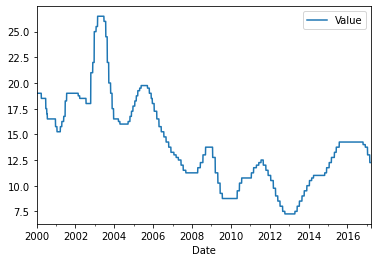

In [9]:
# Obtendo os dados desde o inicio e indo ate uma data limite especifica, nesse caso 26/03/2017

selic_filtrada = selic.loc[:'2017-03-26']
selic_filtrada.plot()

METODO .ILOC

Esse operador eh utilizado quando o filtro deve ser feito com a posicao da linha dentro do nosso dataframe

Por exemplo, caso precise da linha 0 ou da linha 1, ou ate mesmo se precisar da linha 20 ate a linha 200

In [10]:
# Obtendo a primeira linha

selic_filtrada = selic.iloc[0]
selic_filtrada

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [11]:
# Obtendo a ultima linha

selic_filtrada = selic.iloc[-1]
selic_filtrada

Value    13.75
Name: 2022-08-27 00:00:00, dtype: float64

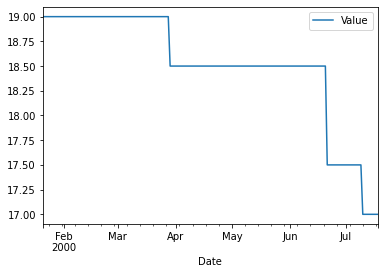

In [12]:
# Obtendo da linha 200 ate a linha 500

selic_filtrada = selic.iloc[20:200]
selic_filtrada.plot()

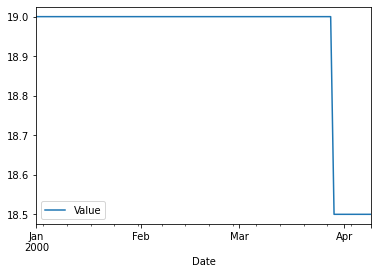

In [13]:
# Obtendo todas as linhas ate a linha 100

selic_filtrada = selic.iloc[:100]
selic_filtrada.plot()

## 2.3 Nocoes Importantes de Dataframes
Pra demonstrar manipulacoes de dados em um dataframe de varias colunas, vou extrair os dados que compoem o IBOV

Para saber a composicao atualizada do IBOV, acesse o link: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Nessa secao vou utilizar algumas bibliotecas de dados de mercado financeiro, como a yfinance, que extrai os dados do Yahoo Finance

Os ativos que compoem o IBOV sao esses:
['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

Vou transformalos em uma lista

In [14]:
tickers_IBOV = ['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

In [15]:
# Ordenando esses papeis em ordem alfabetica

tickers_IBOV.sort()
tickers_IBOV

['ABEV3',
 'ALPA4',
 'AMER3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BIDI11',
 'BPAC11',
 'BPAN4',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'BRML3',
 'CASH3',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GNDI3',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'JHSF3',
 'KLBN11',
 'LCAM3',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'POSI3',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RDOR3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SOMA3',
 'SULA11',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VBBR3',
 'VIIA3',
 'VIVT3',
 'WEGE3',
 'YDUQ3']

**IMPORTANTE:**

As acoes brasileiras no Yahoo Finance terminam com ".SA". Isso e valido inclusive para outros papeis, como ETFs, FIIs, BDRs 

In [16]:
# Formatando os papeis da lista no padrao do Yahoo Finance

ativo_SA = 0
tickers_IBOV_SA = []

for i in tickers_IBOV:
  ativo_SA = (i + '.SA')
  tickers_IBOV_SA.append(ativo_SA)

tickers_IBOV_SA

['ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BIDI11.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB1

In [17]:
# Extraindo apena 1 papel em um determinado periodo:

yf.download('PETR4.SA', start='2022-02-01', end='2022-02-18', period='1d')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,32.349998,33.320000,31.950001,33.000000,22.041687,57315200
2022-02-02,33.410000,33.490002,32.360001,32.520000,21.721081,36271700
2022-02-03,32.349998,32.919998,31.620001,32.070000,21.420513,51087800
2022-02-04,32.410000,33.230000,31.879999,32.630001,21.794554,59346800
2022-02-07,32.549999,32.779999,32.130001,32.150002,21.473948,48868100
2022-02-08,31.900000,31.950001,31.260000,31.830000,21.260208,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,21.340363,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,21.667646,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,22.549313,88013400


Observando a extrutura do dataframe acima observamos que esta no formato OHLC, muito comum no mercado financeiro

**OHLC:**

**Open**; **High**; **Low**; **Close**

Abertura; Maxima; Minima; Fechamento

Sendo:

**AdjClose** e o fechamento ajustado para o pagamento de dividendos

**Volume** e o volume negociado

In [18]:
# Fazendo uma extracao OHLC para todos os ativos da lista:

yf.download(tickers_IBOV_SA, start='2022-02-01', end='2022-02-18', period='1d')

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- GNDI3.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted


Adj Close                                                         \
            ABEV3.SA   ALPA4.SA   AMER3.SA   ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                          
2022-02-01     14.85  27.070000  31.090000  12.478713  28.820000  13.922749   
2022-02-02     14.52  26.420000  31.209999  12.399358  27.650000  13.795823   
2022-02-03     14.46  25.920000  32.000000  12.399358  27.330000  13.805587   
2022-02-04     14.41  25.830000  32.150002  12.796137  26.370001  13.795823   
2022-02-07     14.29  25.959999  32.200001  12.667184  26.260000  13.375992   
2022-02-08     14.16  26.440001  33.270000  12.409277  26.410000  13.229541   
2022-02-09     14.54  26.840000  34.029999  12.508471  28.110001  13.825113   
2022-02-10     14.75  26.600000  33.950001  12.577909  28.620001  13.766532   
2022-02-11     14.86  27.090000  32.540001  12.240646  26.950001  13.590790   
2022-02-14     15.06  27.299999  33.720001  12.230726  26.990000  13.786059   
2022-02-15     15.38  28.020000  35.860001  12.081934  29.270000  14.254708   
2022-02-16     15.08  27.090000  35.439999  12.944929  29.290001  14.244944   
2022-02-17     14.85  26.799999  34.279999  13.143319  28.780001  13.864167   

                                                        ...    Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...  TIMS3.SA   
Date                                                    ...             
2022-02-01  31.131735  16.752943  20.425116  21.447060  ...   8627700   
2022-02-02  30.616211  16.473989  20.057884  21.177692  ...   3630000   
2022-02-03  30.826239  16.705891  20.352722  21.298445  ...   6519300   
2022-02-04  30.768959  16.741568  20.486740  21.205559  ...   3370700   
2022-02-07  30.415733  16.768328  20.415264  22.422348  ...  10904600   
2022-02-08  30.740322  16.830761  20.299118  22.385195  ...   6965300   
2022-02-09  30.473013  15.350155  18.556896  22.543098  ...  29046800   
2022-02-10  30.807148  15.475025  18.824928  22.626694  ...   8989100   
2022-02-11  31.885927  15.635571  18.887472  21.979710  ...   7409300   
2022-02-14  32.019573  15.751523  18.914274  22.568798  ...   6602900   
2022-02-15  33.537498  15.929911  18.932142  22.346682  ...   4562700   
2022-02-16  33.728432  16.063700  19.155506  22.288738  ...   4051700   
2022-02-17  33.728432  15.903150  18.932142  22.375654  ...   3886000   

                                                                       \
            TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA   
Date                                                                    
2022-02-01   6024600  4031300  22618500  24131300   5671500  61176300   
2022-02-02   4367600  5389400  13505200  17489000   3963900  51646000   
2022-02-03   2745300  6936700  20575800  19179400   7868700  56051800   
2022-02-04   3566100  5738300  14148800  24535400  10097900  52345500   
2022-02-07   5266900  5707100  21626800  24915800   5616200  57982300   
2022-02-08   3898100  6809800  14037400  26598600   4750000  40448200   
2022-02-09   3396200  5287400  14784800  24815300   8016900  48640900   
2022-02-10   4983300  5188100  25220700  47888900   7723700  88372900   
2022-02-11   5154800  7125100  66203500  34555300   8110900  73340800   
2022-02-14   4514100  4354600  23686600  22804400   7618600  56300300   
2022-02-15   6855400  5731500  28728900  29624900  10902900  36145600   
2022-02-16   6116000  8601000  20383200  20774700  19215900  45592600   
2022-02-17  14125600  5515000  29080100  36259300  12474100  60121500   

                                        
           VIVT3.SA  WEGE3.SA YDUQ3.SA  
Date                                    
2022-02-01  1418200   4459400  4126200  
2022-02-02  1399500   4925100  2286400  
2022-02-03  1269200   5506300  3588300  
2022-02-04  1246900   5170800  2392300  
2022-02-07  1712600   5010100  6908800  
2022-02-08  1925000   6430500  4598900  
2022-02-09  2642500   5009700  1932100 

Na yFinance as vezes pode ocorrer de erro na busca de ativos. Note acima que nesse caso houve erro em GNDI3.SA e BIDI11.SA

Perceba que a estrutura acima replica as 5 colunas(Abertura, Maxima, Minima, Fechamento, Fechamento Ajustado e Volume) para todos os papeis. Isso cria uma estrutura muito grande e dificil de trabalhar. E melhor selecionar apenas uma coluna especifica  para esses papeis:

In [19]:
# Agora vou extrair os dados, mas armazenando na variavel cotacoes_IBOV

cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2022-02-01', end='2022-02-18', period='1d')

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- GNDI3.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted


Para facilitar, vou obter apenas os dados da coluna **Adj Close** para todos os papeis de uma vez

In [20]:
# Pra isso basta passar o nome da coluna como ultimo parametro

yf.download(tickers_IBOV_SA, start='2022-02-01', end='2022-02-18', period='1d')['Adj Close']

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- GNDI3.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-01,14.85,27.070000,31.090000,12.478713,28.820000,13.922749,31.131733,16.752941,20.425114,21.447060,...,12.996955,28.835146,14.220045,15.740063,78.103485,22.448589,4.70,47.875542,31.589539,22.033382
2022-02-02,14.52,26.420000,31.209999,12.399358,27.650000,13.795823,30.616213,16.473989,20.057884,21.177694,...,12.947688,28.516306,13.788845,15.778012,78.542938,22.259611,4.40,47.788692,31.303793,21.834883
2022-02-03,14.46,25.920000,32.000000,12.399358,27.330000,13.805587,30.826242,16.705891,20.352724,21.298445,...,13.243296,28.097826,14.229629,15.370044,78.506317,22.339180,4.48,48.387012,30.495827,22.311281
2022-02-04,14.41,25.830000,32.150002,12.796137,26.370001,13.795823,30.768957,16.741570,20.486738,21.205559,...,13.115200,28.366848,13.913414,15.483894,80.566254,22.518213,4.22,47.972046,30.397293,21.457737
2022-02-07,14.29,25.959999,32.200001,12.667184,26.260000,13.375992,30.415731,16.768326,20.415264,22.422348,...,12.977248,28.336958,13.463048,15.986743,82.516319,22.100471,4.06,47.383373,30.545090,22.370832
2022-02-08,14.16,26.440001,33.270000,12.409277,26.410000,13.229541,30.740320,16.830761,20.299116,22.385195,...,13.253150,27.848732,13.568453,15.948791,83.669884,21.991066,4.14,47.537773,29.776535,21.725708
2022-02-09,14.54,26.840000,34.029999,12.508471,28.110001,13.825113,30.473013,15.350155,18.556896,22.543098,...,13.923199,28.396740,13.740932,16.081619,83.688194,22.637568,4.04,48.830933,29.845512,21.497435
2022-02-10,14.75,26.600000,33.950001,12.577909,28.620001,13.766532,30.807144,15.475024,18.824928,22.626694,...,13.755686,27.599638,13.903831,15.920329,85.940392,22.717138,4.34,47.846592,29.303581,21.527210
2022-02-11,14.86,27.090000,32.540001,12.240646,26.950001,13.590790,31.885925,15.635573,18.887470,21.979710,...,13.696565,27.529890,13.922996,14.734368,84.200890,22.727085,4.12,48.097504,29.096663,21.060738


Perceba acima que reduziu o numero de colunas de 552 para 92 (Adj Close dos 92 ativos da lista)

Agora vamos criar um novo dataframe com o resultado da busca de cotacao ao longo de todo o periodo de 2021, considerando todos as colunas disponiveis (OHLC, ADJClose e Volume)

In [21]:
cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2021-01-01', end='2021-12-31', period='1d')

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- GNDI3.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted


In [31]:
# Reforcando a complexidade do dateframe, composto por dois indices de colunas
# Indice 0 pros parametros das contacoes e indice 1 para os ativos

cotacoes_IBOV.columns # Retornando somente o nome das colunas

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BBSE3.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=552)

In [32]:
# Usando o SET podemos remover as duplicatas e ver a lista de parametros disponiveis
# Excelente pra usar quando nao conhecemos o dataframe

set(cotacoes_IBOV.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [26]:
# Retornando a coluna desejada

cotacoes_AdjClose = cotacoes_IBOV['Adj Close']
cotacoes_AdjClose

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.827890,41.191311,73.699677,NaN,37.730000,18.726879,33.309525,18.209650,20.492168,26.200596,...,13.738349,27.386225,22.572634,13.088719,71.178856,19.891273,16.170000,41.080933,36.344982,33.214752
2021-01-05,15.143991,41.211086,72.052757,NaN,38.200001,18.763731,32.963932,18.122593,20.367229,25.710283,...,13.424168,27.257975,22.385466,13.228893,72.377365,20.118864,16.219999,40.732193,38.575745,33.380825
2021-01-06,15.450509,38.966091,67.347267,NaN,36.669998,18.456633,33.717140,18.578161,21.042259,25.291288,...,13.052860,25.965612,22.114067,13.868434,74.751038,19.827547,15.490000,40.276142,39.598598,32.052238
2021-01-07,15.373878,38.273796,65.984634,NaN,36.049999,18.972557,35.055195,19.033733,21.600904,25.826174,...,12.843405,25.896557,22.787880,14.534260,79.630661,20.191689,15.080000,39.256710,41.235146,32.452770
2021-01-08,15.833660,40.251770,70.582291,NaN,36.599998,19.252016,35.258999,18.887022,21.414690,26.628510,...,13.424168,27.622995,23.377464,14.464173,79.381622,20.756109,15.530000,40.285076,43.728931,33.556667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.550000,36.379086,30.124914,13.976556,26.459999,11.061213,27.895409,14.465510,17.159117,19.152811,...,12.681639,28.504419,13.673858,14.098693,72.463844,20.926821,4.500000,46.791946,32.978844,20.177418
2021-12-27,15.530000,36.488602,31.271875,13.530179,25.670000,10.993176,27.952690,14.616840,17.355320,19.273560,...,12.701346,28.573845,13.951743,14.269472,72.280739,21.195368,4.860000,46.510464,32.683243,19.919369
2021-12-28,15.520000,36.588161,30.419008,12.994527,25.750000,10.847377,27.790396,14.607940,17.292894,19.310715,...,12.573249,28.087862,13.999653,13.994329,70.541252,21.354507,4.950000,46.302525,32.801491,20.703440


In [30]:
# Pegando a coluna de um papel em especifico

cotacoes_AdjClose_AMBEV = cotacoes_IBOV[('Adj Close', 'ABEV3.SA')]
cotacoes_AdjClose_AMBEV 

Date
2021-01-04    14.827890
2021-01-05    15.143991
2021-01-06    15.450509
2021-01-07    15.373878
2021-01-08    15.833660
                ...    
2021-12-23    15.550000
2021-12-27    15.530000
2021-12-28    15.520000
2021-12-29    15.450000
2021-12-30    15.420000
Name: (Adj Close, ABEV3.SA), Length: 248, dtype: float64

Note acima que nao foi retornado um dataframe(nao possui colunas), como possui apenas uma coluna ele desconsidera o formato dateframe e traz como um formato "series" da biblioteca Pandas.

Para retornar um data frame basta usarmos o pd.DateFrame do Pandas:

In [29]:
# Forcando o retorno de um dataframe com Pandas

cotacoes_AdjClose_AMBEV = cotacoes_IBOV[('Adj Close', 'ABEV3.SA')]
cotacoes_AdjClose_AMBEV = pd.DataFrame(cotacoes_AdjClose_AMBEV) # Atribundo a conversao a ele mesmo
cotacoes_AdjClose_AMBEV

,Adj Close
,ABEV3.SA
Date,
2021-01-04,14.827890
2021-01-05,15.143991
2021-01-06,15.450509
2021-01-07,15.373878
2021-01-08,15.833660
...,...
2021-12-23,15.550000
2021-12-27,15.530000
